In [1]:
import pandas as pd
import numpy as np

filename = 'BRAZPD_UnofM_all.csv'

df = pd.read_csv(filename, engine='python')


In [2]:
display(df)

,CODPAX,Hemoglobin,Potassium,Phosphate,Mean_PAS_1T,Mean_PAD_1T,Mean_PAS_2T,Mean_PAD_2T,Mean_PAS_3T,Mean_PAD_3T,...,Diastolic70,Systolic71,Diastolic71,Systolic72,Diastolic72,Systolic73,Diastolic73,Systolic74,Diastolic74,_merge
0,1349037,12.933333,4.433333,5.300000,110.500000,70.000000,125.000000,80.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
1,1349040,14.000000,3.766667,5.933333,129.500000,77.000000,120.333333,68.666667,136.000000,82.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
2,1349048,11.833333,4.366667,6.100000,158.000000,81.000000,154.666667,87.666667,147.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,1349051,10.066667,4.733333,5.533333,140.000000,75.000000,147.333333,92.333333,169.333333,99.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
4,1349055,11.933333,4.033333,4.066667,103.500000,60.000000,154.666667,82.000000,129.333333,72.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,126.666667,76.666667,126.666667,83.333333,120.000000,80.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5703,347457071,9.700000,4.300000,3.233333,130.000000,80.000000,113.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5704,347457072,10.466667,4.433333,4.466667,136.666667,80.000000,143.333333,73.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
5705,347457073,11.766667,4.533333,3.566667,126.666667,80.000000,136.666667,83.333333,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3


# Feature Selection and Combination

In [3]:
# Separate features to unique features and time series features
unique_cols = []
timeseries_cols = []
time_indices = str(np.arange(100))
# print(time_indices)
for col in list(df.columns):
    add = True
    for idx in time_indices:
        if idx in col:
            add = False
    if add == True:
        unique_cols.append(col)
    else:
        timeseries_cols.append(col)
# print(unique_cols)
# print(timeseries_cols)

# Adjust missclassified features
adjlist = ['ModalidadeCAPD0APD1Mix2', 'Dropoutsim1', 'Agedic65', 'Educationdic4y', 
           'Followup1y', 'Followup2y', 'Followup3y']
for i in range(len(adjlist)):
    unique_cols.append(adjlist[i])
    timeseries_cols.remove(adjlist[i])
# print(unique_cols)
# print(timeseries_cols)

In [4]:
df_selected = df[unique_cols]
# display(df_selected)

Group_p1 = []
Ms10ou_p1 = []

storage_p1 = [Group_p1, Ms10ou_p1]

Mean_PAS_p1 = []
Mean_PAD_p1 = []

Mean_PAS_p2 = []
Mean_PAD_p2 = []

storage_p2 = [Mean_PAS_p1, Mean_PAD_p1, Mean_PAS_p2, Mean_PAD_p2]

Ureia = dict()
Creatinine = dict()
TGP = dict()
Potassium = dict()
Calcium = dict()
Phosphate = dict()
Glucose = dict()
Hemoglobin = dict()
Hematocrit = dict()
Volume_Total = dict()
Systolic = dict()
Diastolic = dict()


label_dict = [Ureia, Creatinine, TGP, Potassium, Calcium, Phosphate, Glucose, 
              Hemoglobin, Hematocrit, Volume_Total, Systolic, Diastolic]

label_str = ['Ureia', 'Creatinine', 'TGP', 'Potassium', 'Calcium', 'Phosphate', 'Glucose', 
              'Hemoglobin', 'Hematocrit','Volume_Total', 'N_AH', 'Systolic', 'Diastolic']

label_idx = 0

for item in label_dict:
    for i in range(13):
        key = 'p'+str(i+1)
        item[key] = []
    label_idx = label_idx + 1
    
label_idx = 0    
for item in label_dict:
    count = 0
    section = 1
    labelname = label_str[label_idx]
    for col in timeseries_cols:
        if labelname in col:
            if count < 6:
                count = count + 1
            else:
                section = section + 1
                count = 1
            key = 'p'+str(section)
            item[key].append(col)
    label_idx = label_idx + 1

indices_p1 = ['Group', 'Ms10ou']

indices_p2 = ['Mean_PAS', 'Mean_PAD']



# Select certain features as 1 section
for col in timeseries_cols:
    i = 0
    for idx in indices_p1:
        if idx in col:
            storage_p1[i].append(col)
        i = i + 1
# print(storage_p1)

# Separate certain features to 2 sections (each section contains 4 features)
i = 0 # i is the index of feature name
for idx in indices_p2:
    p = 0
    count = 0
    for col in timeseries_cols:
        if idx in col:
            if count < 4:
                storage_p2[i+2*p].append(col)
                count = count + 1
            else:
                count = 0
                p = p + 1
                storage_p2[i+2*p].append(col)
                count = count + 1
    i = i + 1

for i in range(len(indices_p1)):
    df_selected.loc[:,indices_p1[i]] = df[storage_p1[i]].mean(axis=1)

for i in range(len(indices_p2)):
    for p in range(2):
        name = indices_p2[i] + '_p' + str(p+1)
        df_selected.loc[:,name] = df[storage_p2[i+2*p]].mean(axis=1)       

label_idx = 0
for item in label_dict:
    for p in range(13):
        name = label_str[label_idx] + '_p' + str(p+1)
        df_selected.loc[:,name] = df[item['p'+str(p+1)]].mean(axis=1)
    label_idx = label_idx + 1
        
    
df_selected = df_selected.fillna(0)
display(df_selected)


/home/yitzhang/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/yitzhang/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,CODPAX,Hemoglobin,Potassium,Phosphate,FRR,codigoclinica,CenterSizenpatients,Followup,ModalidadeDPInicial,Deathevent,...,Systolic_p4,Systolic_p5,Systolic_p6,Systolic_p7,Systolic_p8,Systolic_p9,Systolic_p10,Systolic_p11,Systolic_p12,Systolic_p13
0,1349037,12.933333,4.433333,5.300000,0,1,128,4.800000,0.0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1349040,14.000000,3.766667,5.933333,0,1,128,30.400000,0.0,0,...,129.0,133.333333,136.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1349048,11.833333,4.366667,6.100000,1,1,128,7.066667,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1349051,10.066667,4.733333,5.533333,1,1,128,19.700000,0.0,1,...,170.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1349055,11.933333,4.033333,4.066667,0,1,128,8.666667,0.0,1,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5702,347457070,8.400000,5.500000,4.700000,1,347,66,6.133333,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5703,347457071,9.700000,4.300000,3.233333,1,347,66,5.100000,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5704,347457072,10.466667,4.433333,4.466667,1,347,66,5.100000,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5705,347457073,11.766667,4.533333,3.566667,1,347,66,5.100000,1.0,0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

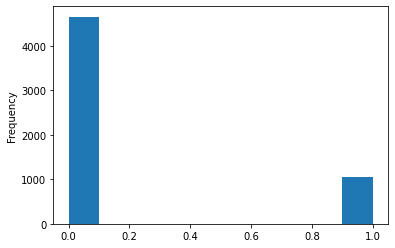

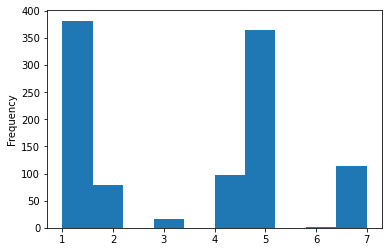

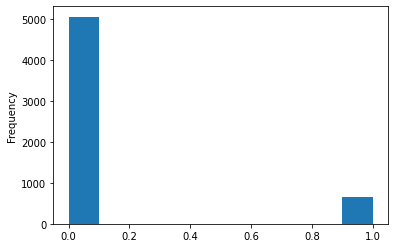

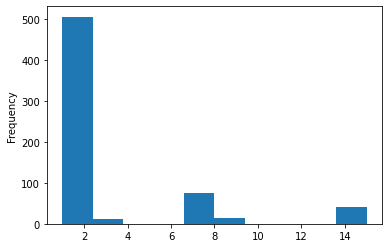

In [46]:
from matplotlib import pyplot as plt

plt.figure()
df_selected['Deathevent'].plot.hist()

plt.figure()
df_selected[df_selected['Deathevent']==1]["Causeofdeath"].plot.hist()

plt.figure()
df_selected['TechniqueFailureevent'].plot.hist()

plt.figure()
df_selected[df_selected['TechniqueFailureevent']==1]["Causeofdropout"].plot.hist()

# Predicting binary outcomes:

* Deathevent   
* TechniqueFailureevent

Target: Deathevent, accuracy: 0.8782837127845884


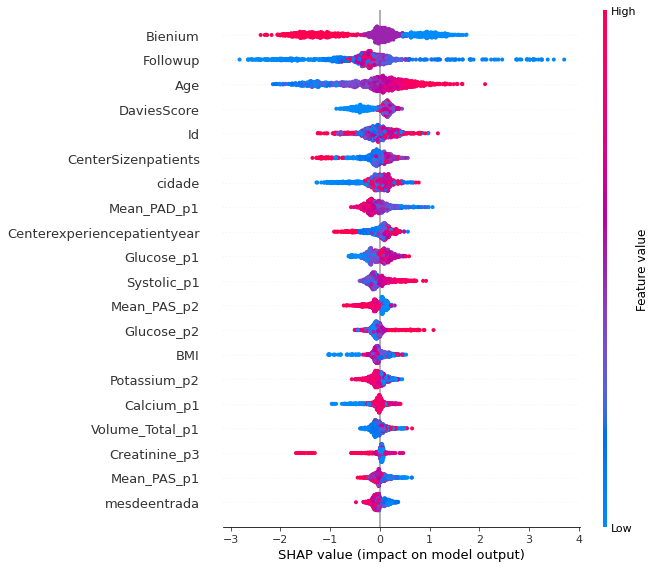

Target: TechniqueFailureevent, accuracy: 0.8791593695271454


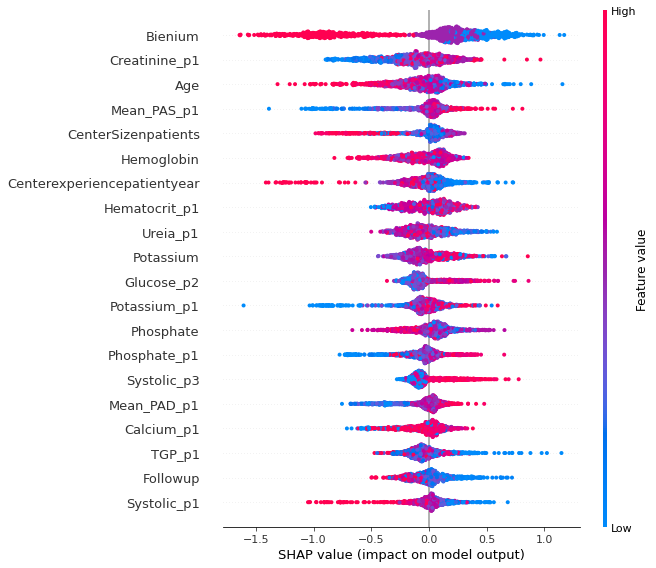

In [6]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score

targets = ["Deathevent","TechniqueFailureevent"]

for target in targets:
    # full dataset
    base_data = df_selected 

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX']) # X is based on patients' personal information

    # Split data into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=None)
    
    # train XGBoost modelm
    model = xgboost.XGBClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    normalised_accuracy = accuracy_score(y_test, y_pred)

    print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, X_test)

# Predicting multiclass outcomes:

* Causeofdeath   
* Causeofdropout

7
Target: Causeofdeath, accuracy: 0.3443396226415094


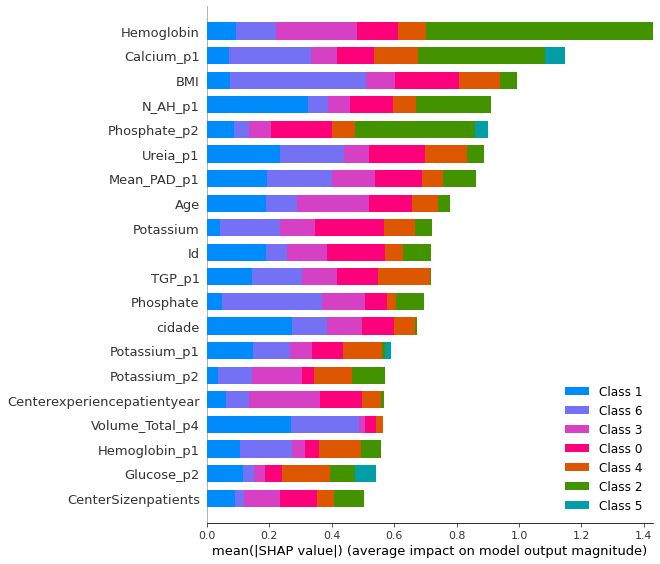

9
Target: Causeofdropout, accuracy: 0.5932203389830508


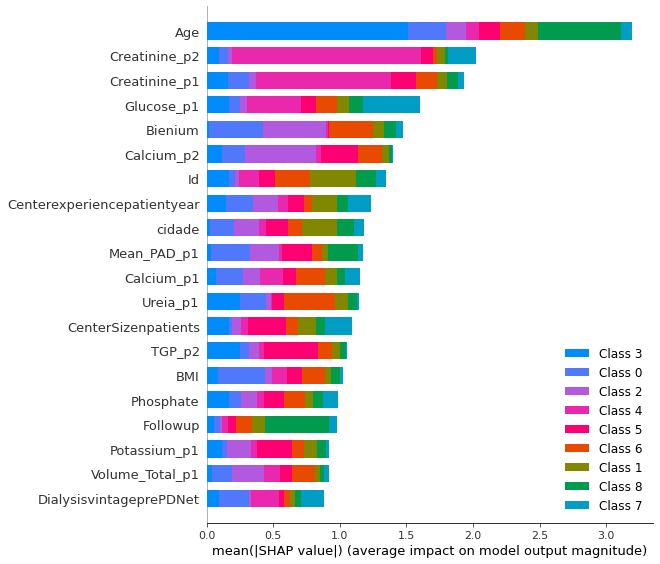

In [8]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

for target in targets:
    base_data = df_selected[df_selected[indicators[target]]==1]

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                'TechniqueFailureevent', 'nome_cidade',\
                                'DataincioPDNEt','TechFailureDeathnotcens',\
                                'CRTechniqueFailure','CRDeath',\
                                'Causeofdropout','Dropoutsim1',\
                                'Anodesada','mesdesaida','anodeentrada',\
                                'CODPAX']) # X is based on patients' personal information

    # Split data into train and test subsets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=None)
    
    # train XGBoost modelm
    model = xgboost.XGBClassifier()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    normalised_accuracy = accuracy_score(y_test, y_pred)

    print(f"Target: {target}, accuracy: {normalised_accuracy}")
    
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)

    shap.summary_plot(shap_values, X_test)

Binary classification for Class 1.0
Target: Causeofdeath, accuracy: 0.5849056603773585


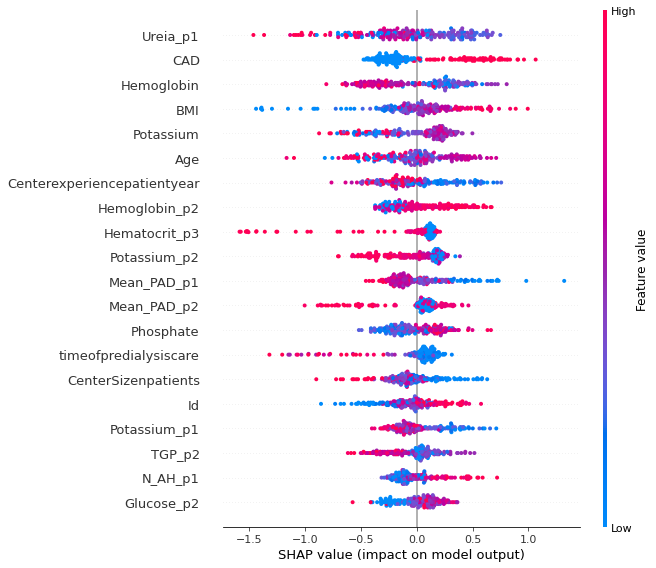

Binary classification for Class 2.0
Target: Causeofdeath, accuracy: 0.9150943396226415


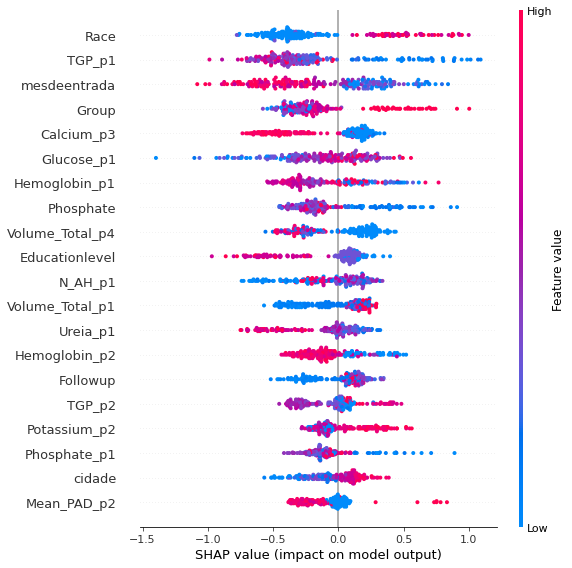

Binary classification for Class 3.0
Target: Causeofdeath, accuracy: 0.9858490566037735


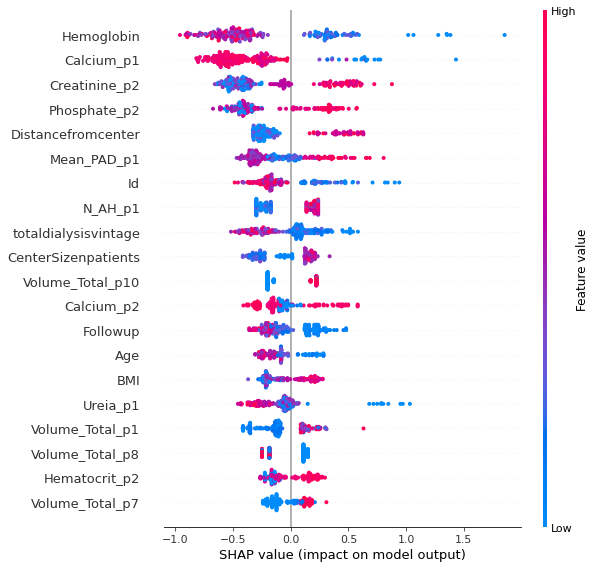

Binary classification for Class 4.0
Target: Causeofdeath, accuracy: 0.9056603773584906


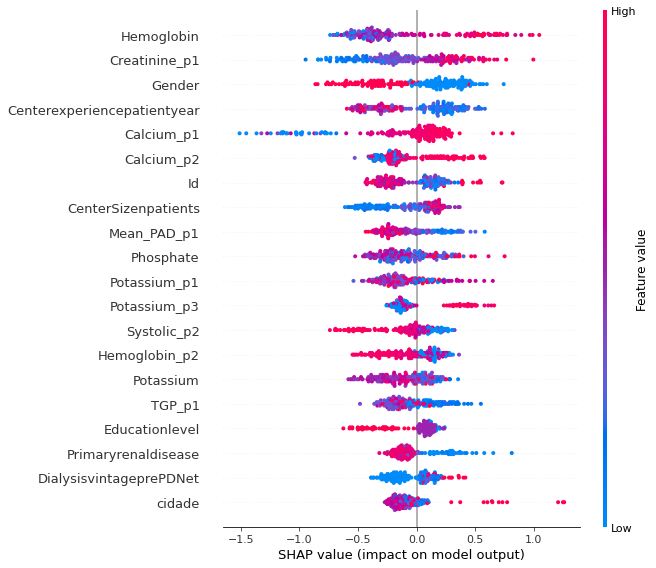

Binary classification for Class 5.0
Target: Causeofdeath, accuracy: 0.5754716981132075


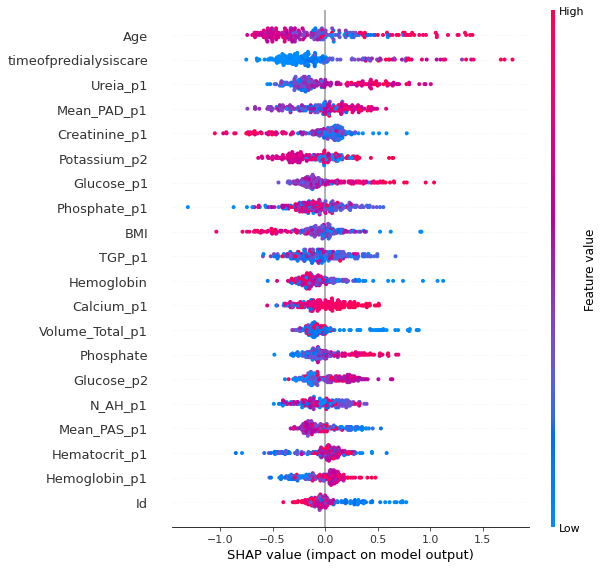

Binary classification for Class 6.0
Target: Causeofdeath, accuracy: 1.0


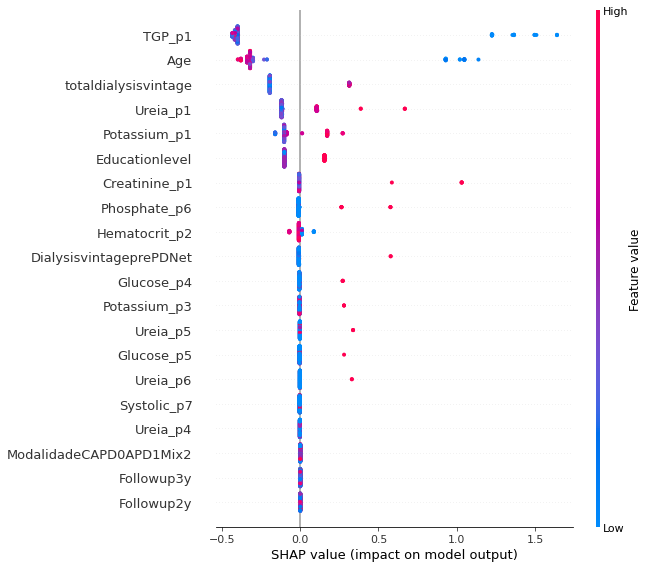

Binary classification for Class 7.0
Target: Causeofdeath, accuracy: 0.9150943396226415


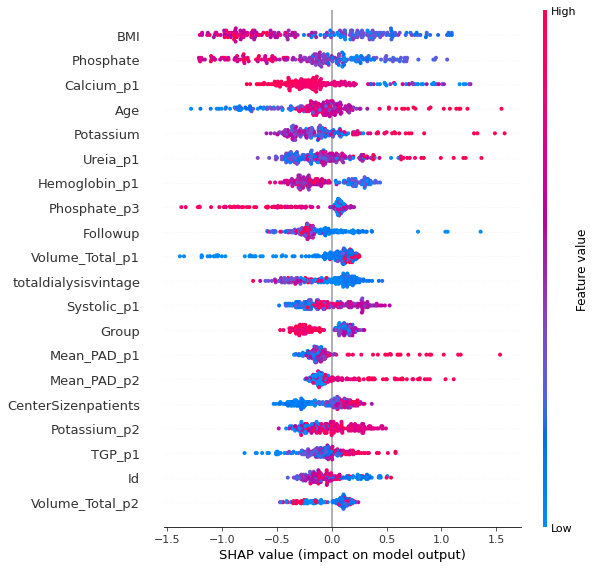

Binary classification for Class 1
Target: Causeofdropout, accuracy: 0.937046004842615


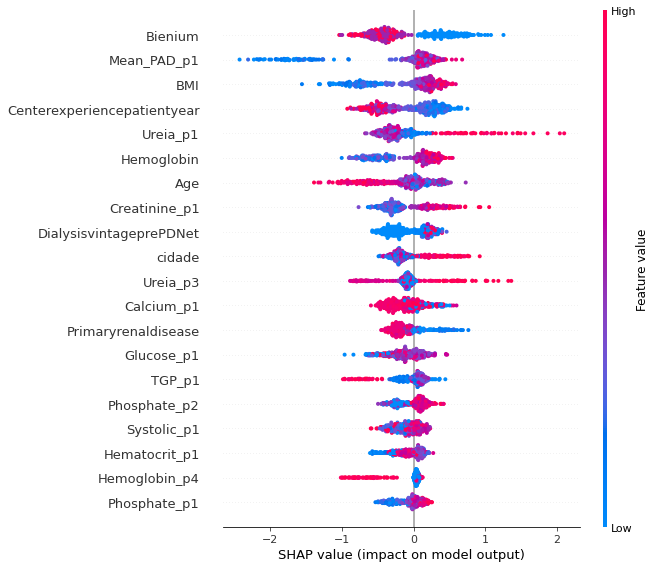

Binary classification for Class 2
Target: Causeofdropout, accuracy: 0.7990314769975787


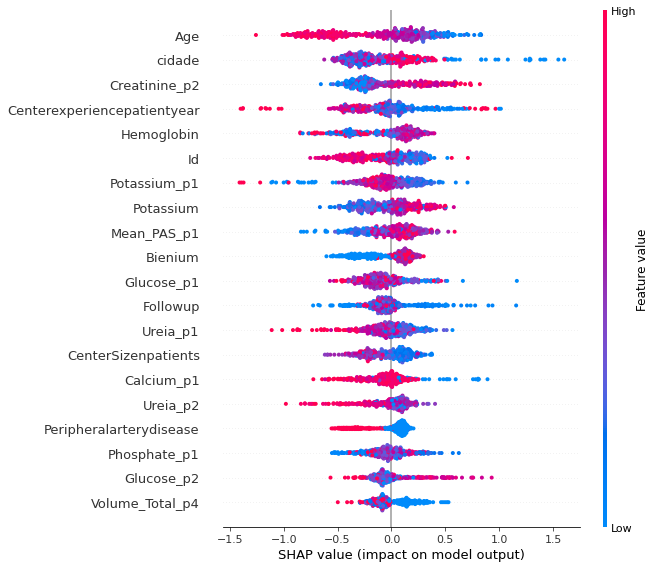

Binary classification for Class 3
Target: Causeofdropout, accuracy: 0.9176755447941889


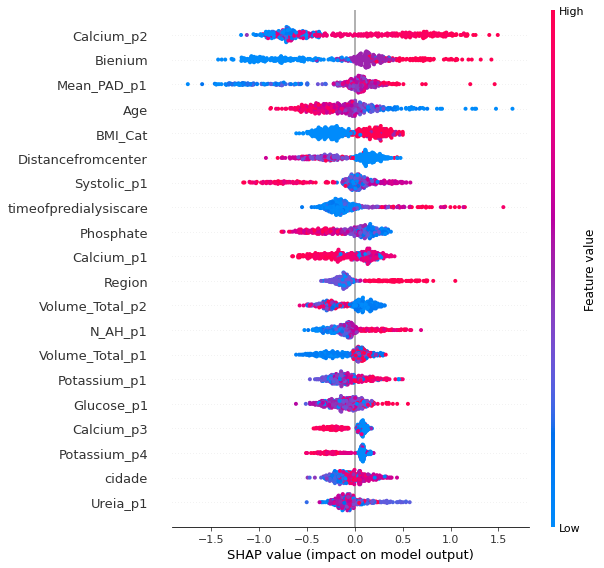

Binary classification for Class 4
Target: Causeofdropout, accuracy: 0.9491525423728814


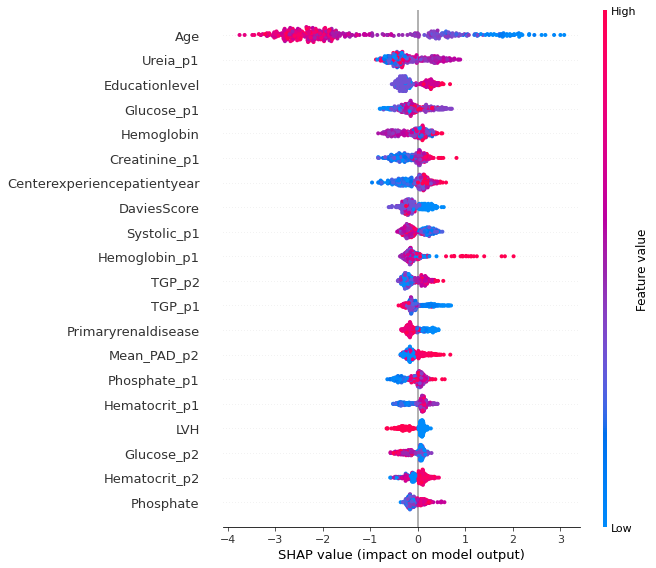

Binary classification for Class 5
Target: Causeofdropout, accuracy: 0.9661016949152542


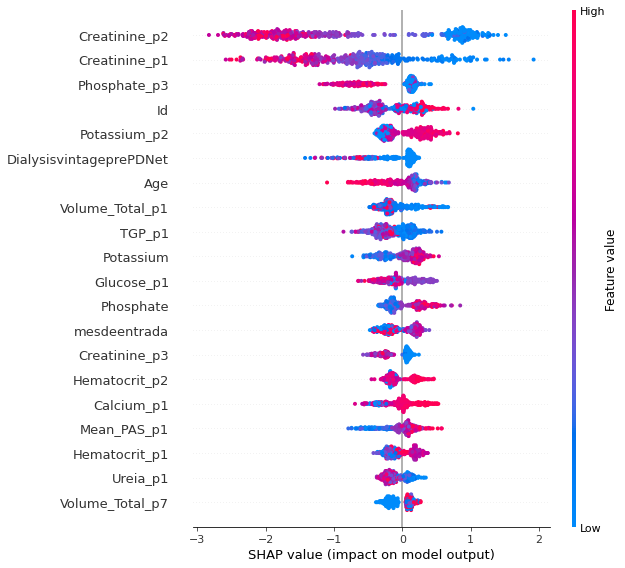

Binary classification for Class 6
Target: Causeofdropout, accuracy: 0.9539951573849879


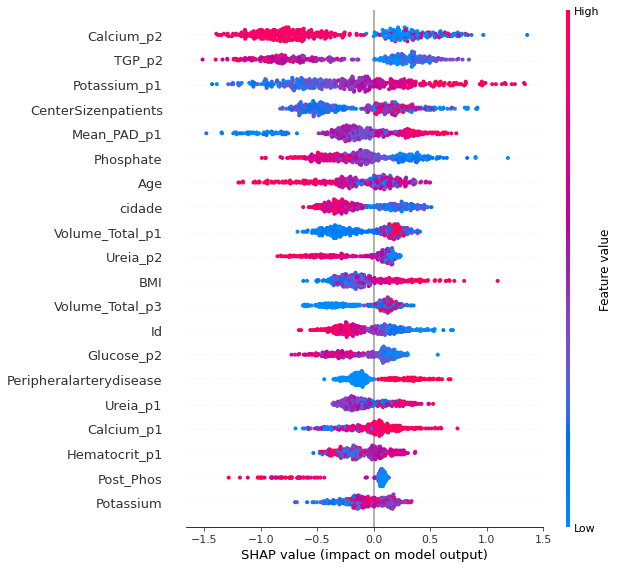

Binary classification for Class 7
Target: Causeofdropout, accuracy: 0.9661016949152542


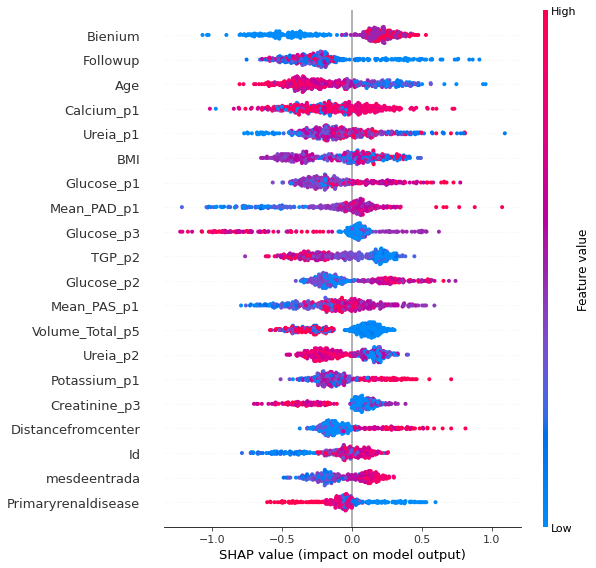

Binary classification for Class 8
Target: Causeofdropout, accuracy: 0.9951573849878934


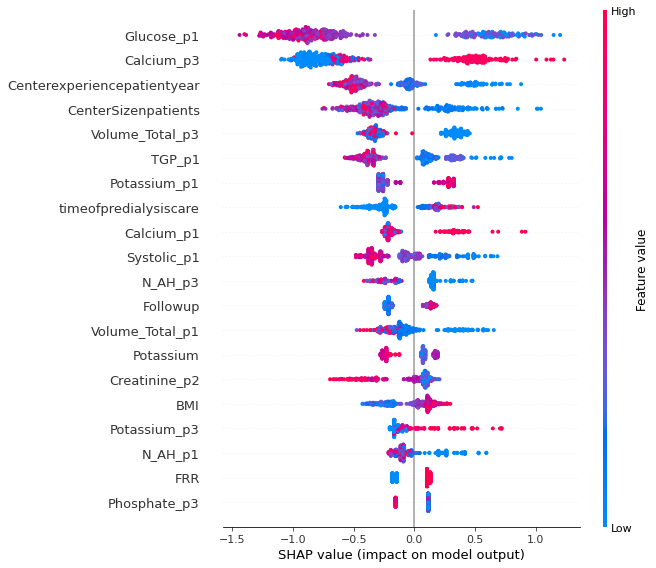

Binary classification for Class 10
Target: Causeofdropout, accuracy: 0.7336561743341404


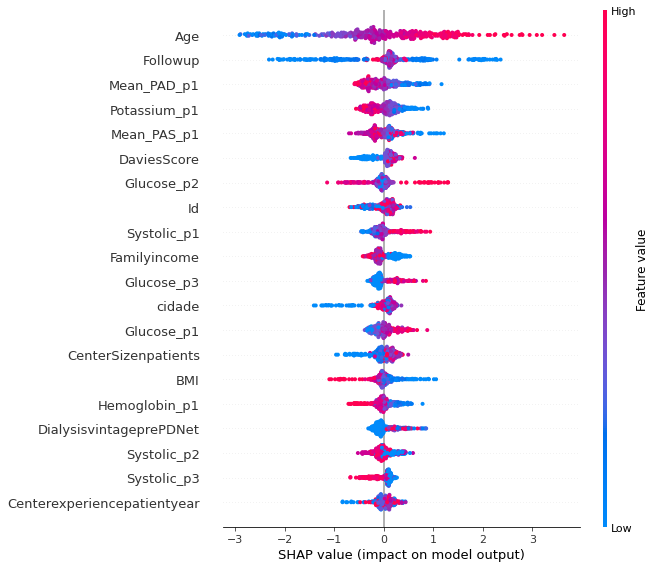

In [49]:
from sklearn.model_selection import train_test_split
import xgboost
import shap
from sklearn.metrics import accuracy_score

targets = ["Causeofdeath","Causeofdropout"]
indicators = {"Causeofdeath":"Deathevent","Causeofdropout":"Dropoutsim1"}

for target in targets:
    base_data = df_selected[df_selected[indicators[target]]==1]

    y = base_data[target] 
    X = base_data.drop(columns=['Deathevent', 'Causeofdeath',\
                                    'TechniqueFailureevent', 'nome_cidade',\
                                    'DataincioPDNEt','TechFailureDeathnotcens',\
                                    'CRTechniqueFailure','CRDeath',\
                                    'Causeofdropout','Dropoutsim1',\
                                    'Anodesada','mesdesaida','anodeentrada',\
                                    'CODPAX']) # X is based on patients' personal information
    
    set1 = set(y)
    for classidx in set1:
        # Create binary classification labels
        y = np.array(y)
        ybi = np.zeros(y.shape)
        for i in range(len(y)):
            if y[i] == classidx:
                ybi[i] = 1
            else:
                ybi[i] = -1       
        # Split data into train and test subsets
        X_train, X_test, y_train, y_test = train_test_split(
            X, ybi, test_size=0.2, shuffle=True, random_state=None)
        
        # train XGBoost modelm
        model = xgboost.XGBClassifier()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)
        normalised_accuracy = accuracy_score(y_test, y_pred)
        
        print("Binary classification for Class",classidx)
        print(f"Target: {target}, accuracy: {normalised_accuracy}")

        explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)

        shap.summary_plot(shap_values, X_test)